In [76]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [78]:
# to import stock values from the internet 
from pandas.io.data import DataReader

In [79]:
# for timestamps
from datetime import datetime

In [80]:
from __future__ import division

In [81]:
# AAPL GOOG MSFT AMAZON
tech_list = ['AAPL','GOOG','MSFT','AMZN','INTC']

In [82]:
# end date is now
end = datetime.now()
# start date is one year from now
start = datetime(end.year-1,end.month,end.day)


In [83]:
# DataReader supports yahoo finance, google finance, world bank. So by specifying yahoo, pandas is importing from Y! Finance
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [84]:
AAPL.describe()
# Adj Close - Adjusted closing price, most people use AdjClose. Takes in account if stock has been split etc.

,Open,High,Low,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,120.233518,121.303636,118.926878,120.097826,5.168349e+07,119.085980
std,7.573526,7.342419,7.800956,7.565389,2.122691e+07,7.311742
min,94.870003,107.370003,92.000000,103.120003,1.302370e+07,102.680478
25%,113.379997,114.519997,112.099998,113.449997,3.732920e+07,112.916660
50%,120.790001,121.360001,119.250000,120.070000,4.705430e+07,119.300003
75%,127.120003,127.879997,125.980003,126.910004,5.936690e+07,125.492359
max,134.460007,134.539993,131.399994,133.000000,1.622063e+08,131.380384


In [85]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2014-12-24 to 2015-12-24
Data columns (total 6 columns):
Open         253 non-null float64
High         253 non-null float64
Low          253 non-null float64
Close        253 non-null float64
Volume       253 non-null int64
Adj Close    253 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


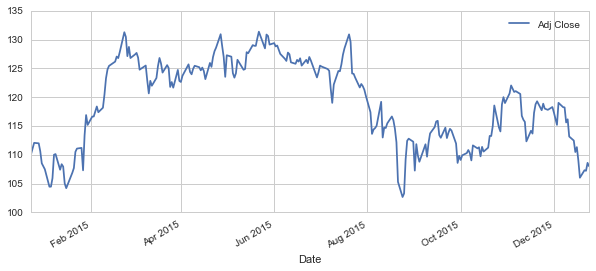

In [86]:
AAPL['Adj Close'].plot(legend='True',figsize=(10,4))

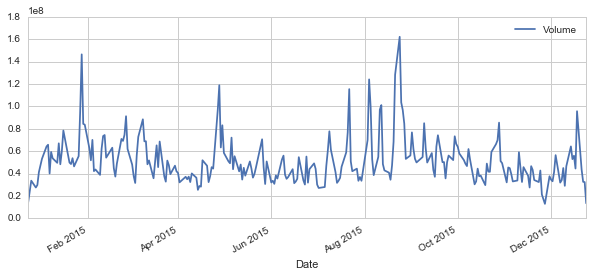

In [87]:
AAPL['Volume'].plot(legend='True',figsize=(10,4))

In [88]:
# Moving average of the stocks. Cancels out noise in price movement
# 10, 20,50 day moving averages
# Adding 3 columsn to the AAPL data frame
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = pd.rolling_mean(AAPL['Adj Close'],ma)

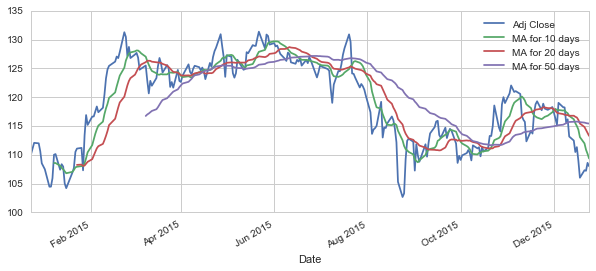

In [89]:
#AAPL
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

# Section 2 - Daily Return Analysis
Going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

In [90]:
# We'll use pct_change to find the percent change for each day
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

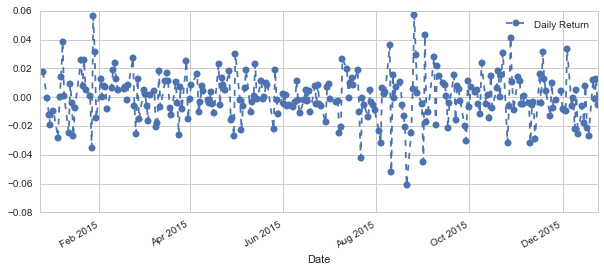

In [91]:
#AAPL.head()
AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

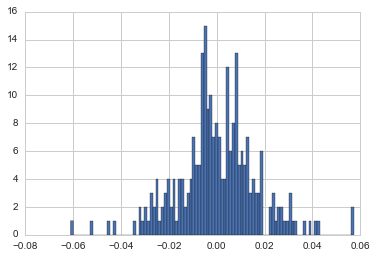

In [92]:
# Average Daily Returns
AAPL['Daily Return'].dropna().hist(bins=100)



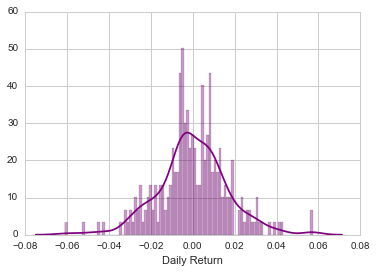

In [93]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

Now let us analyze the returns of all the stocks in our list. Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [94]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [95]:
closing_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2014-12-24 to 2015-12-24
Data columns (total 5 columns):
AAPL    253 non-null float64
AMZN    253 non-null float64
GOOG    253 non-null float64
INTC    253 non-null float64
MSFT    253 non-null float64
dtypes: float64(5)
memory usage: 11.9 KB


Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks, like we did for the Apple stock.

In [96]:
# Make a new data frame called tech_returns
tech_rets = closing_df.pct_change()

In [97]:
tech_rets.head()

,AAPL,AMZN,GOOG,INTC,MSFT
Date,,,,,
2014-12-24,NaN,NaN,NaN,NaN,NaN
2014-12-26,0.017677,0.019998,0.009948,0.002938,-0.005401
2014-12-29,-0.000702,0.009544,-0.006928,-0.009854,-0.008981
2014-12-30,-0.012203,-0.005576,0.000170,-0.011296,-0.009062
2014-12-31,-0.019019,0.000161,-0.007579,-0.012786,-0.012122


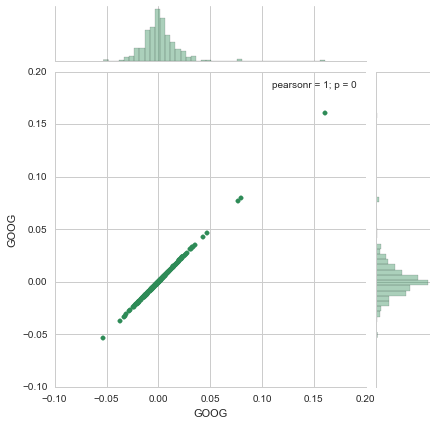

In [98]:
# Compare google to itself

sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

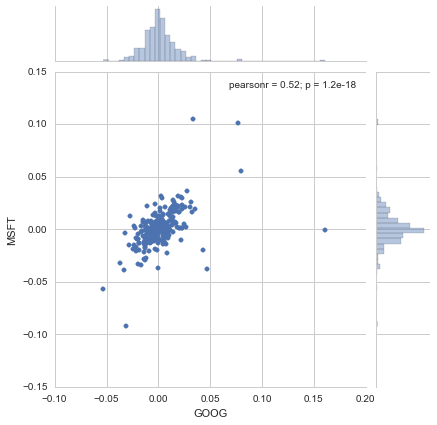

In [99]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

In [100]:
# If pearson value is 1.0 then they very well correlated. 

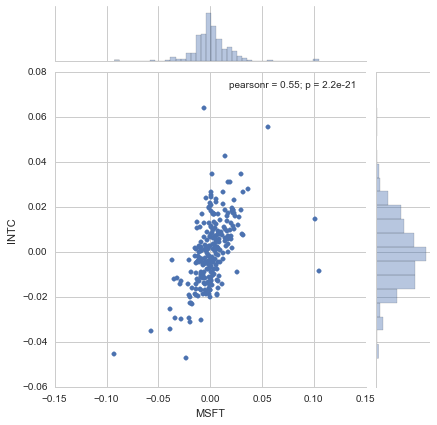

In [117]:
sns.jointplot('MSFT','INTC',tech_rets,kind='scatter')

# Pair Plots

In [101]:
#Using seaborn, pandas to make it easy to compare the stocks n our analysis

In [102]:
tech_rets.head()

,AAPL,AMZN,GOOG,INTC,MSFT
Date,,,,,
2014-12-24,NaN,NaN,NaN,NaN,NaN
2014-12-26,0.017677,0.019998,0.009948,0.002938,-0.005401
2014-12-29,-0.000702,0.009544,-0.006928,-0.009854,-0.008981
2014-12-30,-0.012203,-0.005576,0.000170,-0.011296,-0.009062
2014-12-31,-0.019019,0.000161,-0.007579,-0.012786,-0.012122


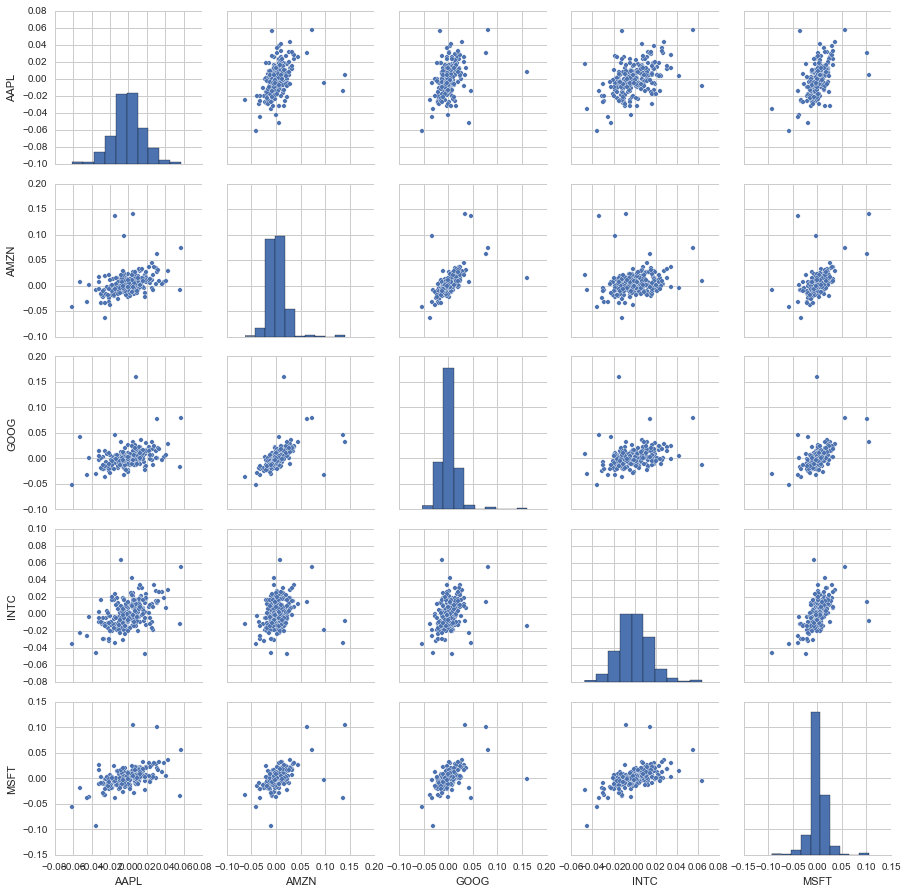

In [103]:
sns.pairplot(tech_rets.dropna())

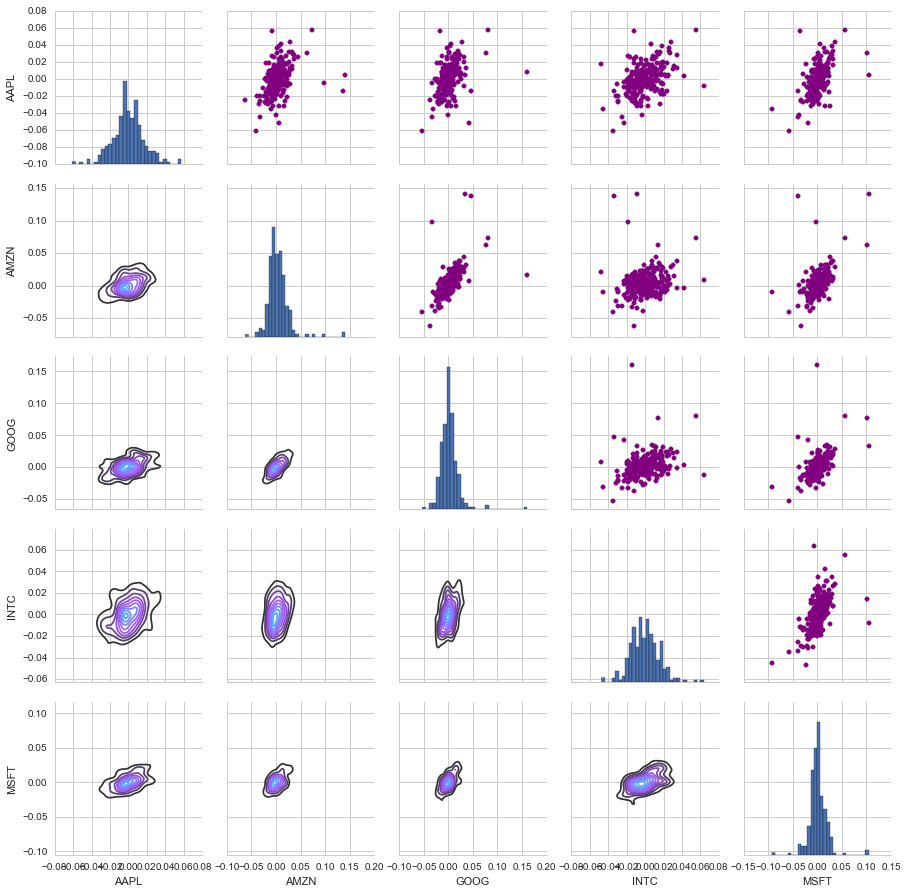

In [104]:
returns_fig = sns.PairGrid(tech_rets.dropna())
#What should the upper triangle look like
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

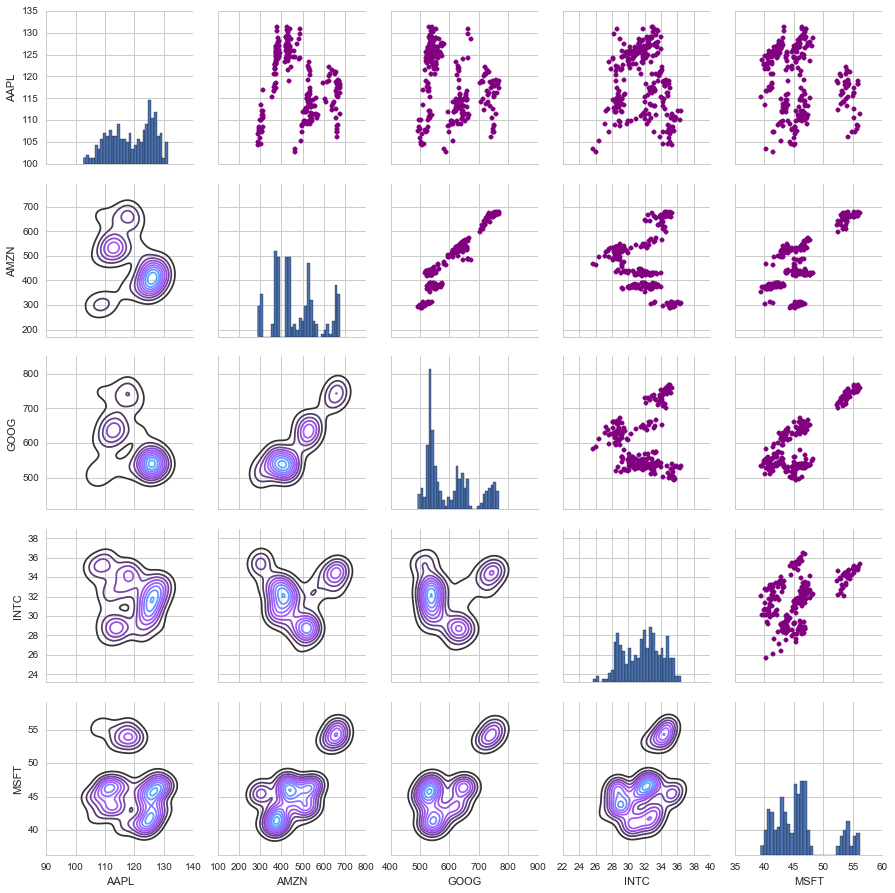

In [105]:
returns_fig = sns.PairGrid(closing_df.dropna())
#What should the upper triangle look like
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

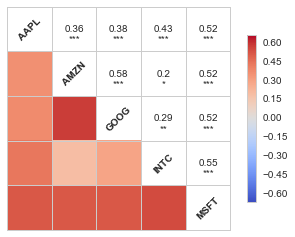

In [106]:
sns.corrplot(tech_rets.dropna(),annot=True)

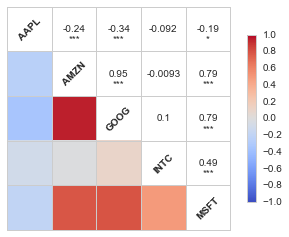

In [107]:
sns.corrplot(closing_df.dropna(),annot=True)

# Risk Analysis

In [108]:
##Quantifying risk

##Compare expected return with SD of daily returns (Risk)

In [109]:
rets = tech_rets.dropna()

In [110]:
area = np.pi*5 # define area for scatter plot)

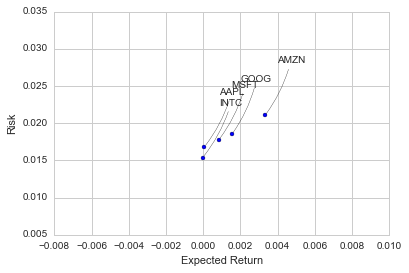

In [111]:
plt.scatter(rets.mean(),rets.std(),s=area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (40, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.1'))



# Value Risk

,AAPL,AMZN,GOOG,INTC,MSFT
Date,,,,,
2014-12-26,0.017677,0.019998,0.009948,0.002938,-0.005401
2014-12-29,-0.000702,0.009544,-0.006928,-0.009854,-0.008981
2014-12-30,-0.012203,-0.005576,0.000170,-0.011296,-0.009062
2014-12-31,-0.019019,0.000161,-0.007579,-0.012786,-0.012122
2015-01-02,-0.009513,-0.005897,-0.003020,0.001929,0.006674


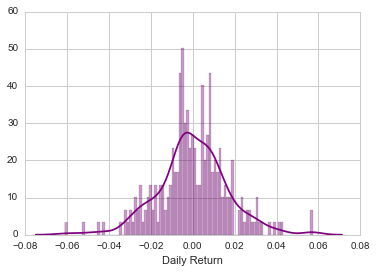

In [120]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

#Using Quantiles to get risk vale

rets.head()

In [121]:
rets['AAPL'].quantile(0.05)

# 1 day 95% of confidence, you will lose only 2.7%, 95% of the itme
#check the bootstrap method on investipedia

-0.027096554015123647

In [122]:
#Value at risk using monte carlo method
# using markov process - using random walk

In [123]:
days = 365
dt = 1/days
mu = rets.mean()['GOOG'] #average retunrs, associated with drift
sigma = rets.std()['GOOG'] #volatility of the stock 

In [127]:
def stock_monte_carlo(start_price, days,mu,sigma):
    price = np.zeros(days) # array
    shock = np.zeros(days)  # another array
    drift = np.zeros(days)
    
    
    price[0]=start_price
    
    for x in xrange(1,days):
        shock[x] = np.random.normal(loc=mu*dt,scale = sigma*np.sqrt(dt)) # for every day, grab from normal distributionGOOG
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1]*(drift[x]+shock[x]) )
    return price    

In [125]:
GOOG.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-12-24,530.512424,531.761394,527.022384,528.772422,705900,528.772422
2014-12-26,528.772422,534.252417,527.312364,534.032454,1036000,534.032454
2014-12-29,532.192446,535.482414,530.013375,530.332426,2278500,530.332426
2014-12-30,528.092396,531.152424,527.132366,530.422394,876300,530.422394
2014-12-31,531.252429,532.602384,525.802363,526.402397,1368200,526.402397


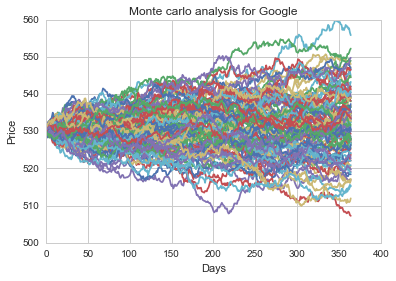

In [128]:
start_price = 530.51
# Running monte carlo 100 times
for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte carlo analysis for Google')

# year's worth of google prices, let's create a histogram

In [129]:
runs = 10000

simulations = np.zeros(runs)

for run in xrange(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]


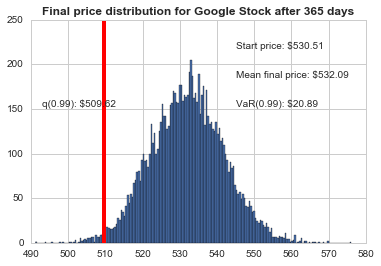

In [130]:
# 1 percentile quantile, 99% of values should fit 
q = np.percentile(simulations,1)
plt.hist(simulations, bins=200)

#Starting price
plt.figtext(0.6,0.8, s= "Start price: $%.2f" %start_price)

#Mean ending price
plt.figtext(0.6,0.7,"Mean final price: $%.2f" %simulations.mean())# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');
